# Solving linear systems of equations

## Motivation

Solving many problems in engineering requires the solution of linear systems of equations. For example, chained chemichal reactions, whether in a bioreactor or inside a cell, will each satisfy an equation and the combined system will be adequately described by a system of equations. The same will be true of electric circuits or structures that are composed of multiple connected components.

$$\begin{array}{cccccccccccc}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& \dots &+& a_{1n}x_n = &b_1 \\
a_{21}x_1 &+& a_{22}x_2 &+& a_{23}x_3 &+& \dots &+& a_{2n}x_n = &b_2 \\
\ \vdots &&\ \vdots &&\ \vdots &&\ \ddots &&\ \vdots \ & \vdots \\
a_{n1}x_1 &+& a_{n2}x_2 &+& a_{n3}x_3 &+& \dots &+&a_{nn}x_n = &b_n
\end{array}$$

# Hand solving systems

## Graphically

We are limited to systems with at most 2 unknowns.

#### Example

In a chicken and rabbit farm, there are 35 heads and 94 legs. How many chickens and how many rabbits do we have?

$$x_1 + x_2 = 35\\
2x_1 + 4x_2 = 94$$

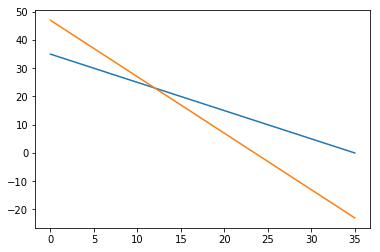

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(0, 35)
ys1 = 35 - xs
ys2 = (94 - 4*xs) / 2

plt.plot(xs, ys1)
plt.plot(xs, ys2);

How would you do it for a system of three equations with three incognitas? And for four?

### Types of systems:

* Well-conditioned
* Ill-conditioned: no solution, infinite solutions, close slopes.

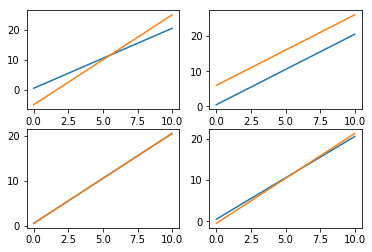

In [3]:
f, axes = plt.subplots(2, 2)

xs = np.linspace(0, 10)

well_1 = 2 * xs + 1/2
well_2 = 3 * xs - 5

a_1 = 2 * xs + 1/2
a_2 = 2 * xs + 6

b_1 = 2 * xs + 1/2
b_2 = 4 * xs / 2 + 1/2

c_1 = 2 * xs + 1/2
c_2 = 5/2.3 * xs + -.5

axes[0,0].plot(xs, well_1)
axes[0,0].plot(xs, well_2)
axes[0,1].plot(xs, a_1)
axes[0,1].plot(xs, a_2)
axes[1,0].plot(xs, b_1)
axes[1,0].plot(xs, b_2)
axes[1,1].plot(xs, c_1)
axes[1,1].plot(xs, c_2);

## The coefficient matrix and determinants

$$[A]\{X\} = \{B\}$$


The coefficient matrix can be expressed as:

$$A = \begin{bmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}\\
\end{bmatrix}$$

And the determinant is:
$$D = \begin{vmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}\\
\end{vmatrix}$$

## Cramer's rule

Cramer's rule states that each unknown in a system of linear algebraic equations may be expressed as a fraction of two determinants with denominator D and with the numerator obtained from D by replacing the column of coefficients of the unknown in question by the constants $b_1 ,b_2 , \ldots, b_n$. For example, $x_1$ would be computed as:

$$ x_1 = \frac{\begin{vmatrix}
b_{1}&a_{12}&a_{13}\\
b_{2}&a_{22}&a_{23}\\
b_{3}&a_{32}&a_{33}\\
\end{vmatrix}}{D}$$

#### Example

Use Cramer's rule to solve
$$\begin{matrix}
0.3x_1 &+& 0.52x_2 &+& x_3 &=& −0.01\\
0.5x_1 &+& x_2 &+& 1.9x_3 &=& 0.67\\
0.1x_1 &+& 0.3x_2 &+& 0.5x_3 &=& −0.44\\
\end{matrix}
$$

In [4]:
import numpy.linalg as la

A = np.array([0.3, 0.52, 1, .5, 1, 1.9, 0.1, 0.3, 0.5]).reshape(3,3)
B = np.array([-0.01, 0.67, -0.44])

In [5]:
first_matrix = A.copy()
first_matrix[:,0] = B
first_matrix

array([[-0.01,  0.52,  1.  ],
       [ 0.67,  1.  ,  1.9 ],
       [-0.44,  0.3 ,  0.5 ]])

In [6]:
A.shape[0]

3

In [7]:
D = la.det(A)
xs = np.zeros(A.shape[0])

for column in range(A.shape[0]):
    matrix = A.copy()
    matrix[:,column] = B
    xs[column] = la.det(matrix) / D

xs

array([-14.9, -29.5,  19.8])

In [8]:
A.dot(xs) 

array([-0.01,  0.67, -0.44])

# Gauss elimination

In particular, we are going to do _naive_ Gauss elimination

## Elimination of unknowns

The basic strategy is to multiply the equations by constants so that one of the unknowns will be eliminated when the two equations are combined. The result is a single equation that can be solved for the remaining unknown.


#### Exercise

Use elimination of unknowns to solve the following equation, either by hand or with code.

$$\begin{matrix}
3x_1 &+& 2x_2 &=& 18\\
−x_1 &+& 2x_2 &=& 2
\end{matrix}
$$

We can extend the procedure to larger systems. In the general case, it will consist of

1. Forward Elimination
2. Back substution



## Forward elimination

We want to reduce the system so that the coefficient matrix is upper triangular. This way we will be able to solve arbitrarily large systems. 

$$\begin{array}{cccccccccccc}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& \dots &+& a_{1n}x_n = &b_1 \\
a_{21}x_1 &+& a_{22}x_2 &+& a_{23}x_3 &+& \dots &+& a_{2n}x_n = &b_2 \\
\ \vdots &&\ \vdots &&\ \vdots &&\ \ddots &&\ \vdots \ & \vdots \\
a_{n1}x_1 &+& a_{n2}x_2 &+& a_{n3}x_3 &+& \dots &+&a_{nn}x_n = &b_n
\end{array}$$

The initial step is to multiply the first equation by $a_{21}/a_{11}$

What will be the result?

We can subtract it from the second equation to obtain:

$$\left(a_{21} - \frac{a_{21}}{a_{11}}a_{11}\right) x_1 + \left(a_{22} - \frac{a_{21}}{a_{11}}a_{12}\right) x_2 + \left(a_{23} - \frac{a_{21}}{a_{11}}a_{13}\right) x_3 + \dots +\left(a_{2n} - \frac{a_{21}}{a_{11}}a_{1n}\right) x_n = b_2 - \left(\frac{a_{11}}{a_{21}}b_1\right)$$


and then from the rest to get:

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
&a'_{22}&a'_{23}&b'_2\\
&a'_{32}&a'_{33}&b'_3\\
\end{array}\right]$$

The primes indicate that the value is not the original one. $a_{11}$ is called the _pivot element_ for this step.


Applying this process row by row gets us from this:

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
a_{21}&a_{22}&a_{23}&b_2\\
a_{31}&a_{32}&a_{33}&b_3\\
\end{array}\right]$$

To this: 

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
 &a'_{22}&a'_{23}&b'_2\\
&&a''_{33}&b''_3\\
\end{array}\right]$$


#### Example

Apply forward elimination to the following system:


$$\begin{matrix}
3x_1 &-& 0.1x_2 &-& 0.2x_3  &=& 7.85\\
0.1x_1 &+& 7x_2 &-& 0.3x_3  &=& -19.3\\
0.3x_1 &-& 0.2x_2 &+& 10x_3  &=& 71.4\\
\end{matrix}
$$

In [9]:
AB = np.array([3,-0.1, -0.2, 7.85, 0.1, 7, -0.3, -19.3, 0.3, -0.2, 10, 71.4]).reshape(3,4)
AB

array([[  3.  ,  -0.1 ,  -0.2 ,   7.85],
       [  0.1 ,   7.  ,  -0.3 , -19.3 ],
       [  0.3 ,  -0.2 ,  10.  ,  71.4 ]])

$$\left(a_{21} - \frac{a_{21}}{a_{11}}a_{11}\right) x_1 + \left(a_{22} - \frac{a_{21}}{a_{11}}a_{12}\right) x_2 + \left(a_{23} - \frac{a_{21}}{a_{11}}a_{13}\right) x_3 + \dots +\left(a_{2n} - \frac{a_{21}}{a_{11}}a_{1n}\right) x_n = b_2 - \left(\frac{a_{11}}{a_{21}}b_1\right)$$

In [10]:
# First pass

ABprime = AB.copy()

pivot = ABprime[0, 0]
factor_1 = ABprime[1,0] / pivot

ABprime[1] = ABprime[1] - ABprime[0] * factor_1
ABprime

array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
       [  0.3       ,  -0.2       ,  10.        ,  71.4       ]])

In [11]:
factor_2 = ABprime[2,0] / pivot
ABprime[2] = ABprime[2] - ABprime[0] * factor_2
ABprime


array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
       [  0.        ,  -0.19      ,  10.02      ,  70.615     ]])

In [12]:
ABprimeprime = ABprime.copy()

pivot = ABprimeprime[1, 1]
factor_3 = ABprimeprime[2,1] / pivot

ABprimeprime[2] = ABprimeprime[2] - ABprimeprime[1] * factor_3
ABprimeprime

array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
       [  0.        ,   0.        ,  10.01204188,  70.08429319]])

## Back substitution

Now we can use the upper triangular form of the coefficient matrix to solve each of the unknowns in turn.

#### Example

Execute back substitution on the triangular matrix we obtained.

In [13]:
x3 = ABprimeprime[2,3] / ABprimeprime[2,2]
x3

7.000000000000002

In [14]:
substituted_1 = ABprimeprime.copy()
substituted_1[1, 3] = substituted_1[1, 3] - x3 * substituted_1[1, 2]
substituted_1[1, 2] = 0
substituted_1

array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,   0.        , -17.50833333],
       [  0.        ,   0.        ,  10.01204188,  70.08429319]])

In [15]:
substituted_1[0, 3] = substituted_1[0, 3] - x3 * substituted_1[0, 2]
substituted_1[0, 2] = 0
substituted_1

array([[  3.        ,  -0.1       ,   0.        ,   9.25      ],
       [  0.        ,   7.00333333,   0.        , -17.50833333],
       [  0.        ,   0.        ,  10.01204188,  70.08429319]])

In [16]:
x2 = substituted_1[1,3] / substituted_1[1,1]
x2

-2.5

In [17]:
substituted_2 = substituted_1.copy()


substituted_2[0, 3] = substituted_1[0, 3] - x2 * substituted_1[0, 1]
substituted_2[0, 1] = 0
substituted_2

array([[  3.        ,   0.        ,   0.        ,   9.        ],
       [  0.        ,   7.00333333,   0.        , -17.50833333],
       [  0.        ,   0.        ,  10.01204188,  70.08429319]])

In [18]:
x1 = substituted_2[0,3] / substituted_2[0,0]
x1

3.0

#### Example

Verify the results we obtained

In [19]:
X = np.array((x1,x2,x3))
X

array([ 3. , -2.5,  7. ])

In [20]:
A = AB.copy()[:,:3]
A.dot(X)

array([  7.85, -19.3 ,  71.4 ])

In [21]:
B = AB.copy()[:,3]
B

array([  7.85, -19.3 ,  71.4 ])

#### Challenge

Can you implement the forward elimination and back substitution procedures for the general case?

Keep the factors we use in forward elimination, because they will be useful later.

In [23]:
A = np.array([3, -0.1, -0.2, 0.1, 7, -0.3, 0.3, -0.2, 10]).reshape(3,3)
B = np.array([7.85, -19.3, 71.4])

def forward_elimination_one_pass(A, B, step):
    AB = np.concatenate((A, B.reshape(-1,1)), axis=1)
    n = A.shape[0]
    rows = range(n-1, step, -1)
    factors = []
    pivot = A[step, step]
    
    for row in rows:
        factor = AB[row,step] / pivot
        AB[row] = AB[row] - factor * AB[step]
        factors.insert(0, factor)
        
    return AB, factors

next_matrix, factors_0 = forward_elimination_one_pass(A, B, 0)
next_matrix, factors_0

(array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
        [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
        [  0.        ,  -0.19      ,  10.02      ,  70.615     ]]),
 [0.03333333333333333, 0.09999999999999999])

In [24]:
next_matrix, factors_1 = forward_elimination_one_pass(next_matrix[:,:3], next_matrix[:,3], 1)
next_matrix, factors_1

(array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
        [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
        [  0.        ,   0.        ,  10.01204188,  70.08429319]]),
 [-0.027129938124702525])

In [25]:
def back_substitution(A, B):
    A = A.copy()
    B = B.copy()
    
    n = B.size
    x = np.zeros_like(B)

    for i in range(n-1, -1, -1):
        # Calculate this unknown
        x[i] = B[i]/A[i, i]
        
        # For each of the rows above:
        for j in range (i-1, -1, -1):
            # Subtract from the independent term...
            B[j] -= A[j, i]*x[i]
            # And from the other side of the equation
            A[j, i] = 0
          
            
        
    return x
        
back_substitution(next_matrix[:,:3], next_matrix[:,3])        

array([ 3. , -2.5,  7. ])

### Pitfalls

* Division by zero → Pivoting
* Round-off errors
* Ill-conditioned systems
* Singular systems and zero diagonal elements

#### Exercise

The three falling parachutists: Suppose that a team of three parachutists is connected by a weightless cord while free-falling at a velocity of 5 m/s. Calculate the tension in each section of cord and the acceleration of the team, given the following:

|parachutist|mass| drag|
|-----------|----|-----|
|1|70|10|
|2|60|14|
|3|40|7|

In [25]:
ms = np.array([70, 60, 40])
cs = np.array([10, 14, 7])

v = 5
g = 9.8

B = g * ms - cs * v
B

array([636., 518., 357.])

In [31]:
A = np.zeros((3,3))
A[:,0] = ms
A[:, 1] = [1, -1, 0]
A[:, 2] = [0, 1, -1]
A

array([[70.,  1.,  0.],
       [60., -1.,  1.],
       [40.,  0., -1.]])

In [39]:
B.reshape(3,1)

array([[636.],
       [518.],
       [357.]])

In [47]:
AB = np.concatenate((A,B.reshape(3,1)), axis=1)
AB

array([[ 70.,   1.,   0., 636.],
       [ 60.,  -1.,   1., 518.],
       [ 40.,   0.,  -1., 357.]])

In [48]:
ABprime = AB.copy()
ABprime[1] = ABprime[1] - ABprime[0] * ABprime[1,0] / ABprime[0,0]
ABprime[2] = ABprime[2] - ABprime[0] * ABprime[2,0] / ABprime[0,0]
ABprime

array([[ 7.00000000e+01,  1.00000000e+00,  0.00000000e+00,
         6.36000000e+02],
       [ 0.00000000e+00, -1.85714286e+00,  1.00000000e+00,
        -2.71428571e+01],
       [ 0.00000000e+00, -5.71428571e-01, -1.00000000e+00,
        -6.42857143e+00]])

In [49]:
ABprimeprime = ABprime.copy()
ABprimeprime[2] = ABprimeprime[2] - ABprimeprime[1] * ABprimeprime[2,1] / ABprimeprime[1,1]
ABprimeprime

array([[ 70.        ,   1.        ,   0.        , 636.        ],
       [  0.        ,  -1.85714286,   1.        , -27.14285714],
       [  0.        ,   0.        ,  -1.30769231,   1.92307692]])

In [50]:
x3 = ABprimeprime[2,3] / ABprimeprime[2,2]
x3

-1.4705882352940962

In [51]:
x2 = (ABprimeprime[1,3] - ABprimeprime[1,2] * x3) / ABprimeprime[1,1]
x2

13.823529411764701

In [53]:
x1 = (ABprimeprime[0,3] - ABprimeprime[0,1] * x2) / ABprimeprime[0,0]
x1

8.888235294117646

In [55]:
xs = np.array([x1,x2,x3])
AB[:,:3].dot(xs)

array([636., 518., 357.])

## Gauss-Jordan

The Gauss-Jordan method is a variation of Gauss elimination. The major difference is that when an unknown is eliminated in the Gauss-Jordan method, it is eliminated from all other equations rather than just the subsequent ones. In addition, all rows are normalized by dividing them by their pivot elements. Thus, the elimination step results in an identity matrix rather than a triangular matrix. Consequently, it is not necessary to employ back substitution to obtain the solution.

In [56]:
AB

array([[ 70.,   1.,   0., 636.],
       [ 60.,  -1.,   1., 518.],
       [ 40.,   0.,  -1., 357.]])

In [57]:
ABprime = AB.copy()
ABprime[1] = ABprime[1] - ABprime[0] * ABprime[1,0] / ABprime[0,0]
ABprime[2] = ABprime[2] - ABprime[0] * ABprime[2,0] / ABprime[0,0]
ABprime

array([[ 7.00000000e+01,  1.00000000e+00,  0.00000000e+00,
         6.36000000e+02],
       [ 0.00000000e+00, -1.85714286e+00,  1.00000000e+00,
        -2.71428571e+01],
       [ 0.00000000e+00, -5.71428571e-01, -1.00000000e+00,
        -6.42857143e+00]])

In [60]:
ABprimeprime = ABprime.copy()
ABprimeprime[0] = ABprimeprime[0] - ABprimeprime[1] * ABprimeprime[0,1] / ABprimeprime[1,1]
ABprimeprime[2] = ABprimeprime[2] - ABprimeprime[1] * ABprimeprime[2,1] / ABprimeprime[1,1]
ABprimeprime[:,:3]

array([[70.        ,  0.        ,  0.53846154],
       [ 0.        , -1.85714286,  1.        ],
       [ 0.        ,  0.        , -1.30769231]])

In [62]:
ABprimeprimeprime = ABprimeprime.copy()
ABprimeprimeprime[0] = ABprimeprimeprime[0] - ABprimeprimeprime[2] * ABprimeprimeprime[0,2] / ABprimeprimeprime[2,2]
ABprimeprimeprime[1] = ABprimeprimeprime[1] - ABprimeprimeprime[2] * ABprimeprimeprime[1,2] / ABprimeprimeprime[2,2]
ABprimeprimeprime

array([[ 70.        ,   0.        ,   0.        , 622.17647059],
       [  0.        ,  -1.85714286,   0.        , -25.67226891],
       [  0.        ,   0.        ,  -1.30769231,   1.92307692]])

In [63]:
ABprimeprimeprime[0] = ABprimeprimeprime[0] / ABprimeprimeprime[0,0]
ABprimeprimeprime[1] = ABprimeprimeprime[1] / ABprimeprimeprime[1,1]
ABprimeprimeprime[2] = ABprimeprimeprime[2] / ABprimeprimeprime[2,2]
ABprimeprimeprime

array([[ 1.        ,  0.        ,  0.        ,  8.88823529],
       [-0.        ,  1.        , -0.        , 13.82352941],
       [-0.        , -0.        ,  1.        , -1.47058824]])

#### Exercise 

Implement Gauss-Jordan step by step to solve the following system of equations:

$$\begin{matrix}
3x_1 &-& 0.1x_2 &-& 0.2x_3  &=& 7.85\\
0.1x_1 &+& 7x_2 &-& 0.3x_3  &=& -19.3\\
0.3x_1 &-& 0.2x_2 &+& 10x_3  &=& 71.4\\
\end{matrix}
$$

In [28]:
AB = np.array([3, -0.1, -0.2, 7.85, 0.1, 7, -0.3, -19.3, 0.3, -0.2, 10, 71.4]).reshape(3,4)
AB

array([[  3.  ,  -0.1 ,  -0.2 ,   7.85],
       [  0.1 ,   7.  ,  -0.3 , -19.3 ],
       [  0.3 ,  -0.2 ,  10.  ,  71.4 ]])

In [29]:
# Eliminate column 0 from rows 1 and 2
AB[1] = AB[1] - AB[0] * AB[1,0] / AB[0,0]
AB[2] = AB[2] - AB[0] * AB[2,0] / AB[0,0]
AB

array([[ 3.00000000e+00, -1.00000000e-01, -2.00000000e-01,
         7.85000000e+00],
       [-1.38777878e-17,  7.00333333e+00, -2.93333333e-01,
        -1.95616667e+01],
       [ 0.00000000e+00, -1.90000000e-01,  1.00200000e+01,
         7.06150000e+01]])

In [30]:
# Eliminate column 1 from rows 0 and 2
AB[0] = AB[0] - AB[1] * AB[0,1] / AB[1,1]
AB[2] = AB[2] - AB[1] * AB[2,1] / AB[1,1]
AB

array([[ 3.00000000e+00,  0.00000000e+00, -2.04188482e-01,
         7.57068063e+00],
       [-1.38777878e-17,  7.00333333e+00, -2.93333333e-01,
        -1.95616667e+01],
       [-3.76503525e-19,  0.00000000e+00,  1.00120419e+01,
         7.00842932e+01]])

In [31]:
# Eliminate column 2 from rows 0 and 1

AB[0] = AB[0] - AB[2] * AB[0,2] / AB[2,2]
AB[1] = AB[1] - AB[2] * AB[1,2] / AB[2,2]
AB

array([[ 3.00000000e+00,  0.00000000e+00, -2.77555756e-17,
         9.00000000e+00],
       [-1.38888186e-17,  7.00333333e+00,  0.00000000e+00,
        -1.75083333e+01],
       [-3.76503525e-19,  0.00000000e+00,  1.00120419e+01,
         7.00842932e+01]])

In [32]:
# Normalize

AB[0] = AB[0] / AB[0,0]
AB[1] = AB[1] / AB[1,1]
AB[2] = AB[2] / AB[2,2]
AB[:,3]

array([ 3. , -2.5,  7. ])

#### Challenge 

Implement Gauss-Jordan for the general case.

In [ ]:
A = np.array([3, -0.1, -0.2, 0.1, 7, -0.3, 0.3, -0.2, 10]).reshape(3,3)
B = np.array([7.85, -19.3, 71.4])

def gauss_jordan(A, B):
    AB = np.concatenate((A, B.reshape(-1,1)), axis=1)
    n = A.shape[0]
    
    for row in range(n):
        others = list(range(n))
        others.remove(row)
        
        for other_row in others:
            # Eliminate column row from other rows
            AB[other_row] = AB[other_row] - AB[row] * AB[other_row,row] / AB[row,row]

    # normalize 
    for row in range(n):
        
        AB[row] = AB[row] / AB[row,row]
    
    return AB

gauss_jordan(A, B)

# LU decomposition for matrix inversion

The main interest of LU descomposition methods is to rethink the elimination step so that it only implies operations on the coefficient matrix. This will allow us to perform the operations much quicker, especially if we need to operate on many different $B$s with the same $A$, as is often the case.

It will also allow us to compute a matrix inverse, which is useful in many engineering applications.

The inverse is useful also for stimulus-response computations: it will give us an indication of how sensitive a particular internal parameter of a (physical) system is to external conditions.

With forward elimination implemented, it is trivial to do LU decomposition: a lower triangular matrix with the factors used to divide is the L matrix, while the result of forward elimination is the U matrix.

Calculating the inverse of a matrix is then as simple as generating solutions with
unit vectors as the right-hand-side constants.

#### Example

Apply LU decomposition to the following system. Verify by multiplyng $L \cdot U$

$$\begin{matrix}
3x_1 &-& 0.1x_2 &-& 0.2x_3  &=& 7.85\\
0.1x_1 &+& 7x_2 &-& 0.3x_3  &=& -19.3\\
0.3x_1 &-& 0.2x_2 &+& 10x_3  &=& 71.4\\
\end{matrix}
$$


We will use the forward_elimination_one_pass function from earlier

In [33]:
AB = np.array([3, -0.1, -0.2, 7.85, 0.1, 7, -0.3, -19.3, 0.3, -0.2, 10, 71.4]).reshape(3,4)
AB

array([[  3.  ,  -0.1 ,  -0.2 ,   7.85],
       [  0.1 ,   7.  ,  -0.3 , -19.3 ],
       [  0.3 ,  -0.2 ,  10.  ,  71.4 ]])

In [34]:
ABprime, factors_0 = forward_elimination_one_pass(AB[:,:3],AB[:,3], 0)
ABprime, factors_0

(array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
        [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
        [  0.        ,  -0.19      ,  10.02      ,  70.615     ]]),
 [0.03333333333333333, 0.09999999999999999])

In [35]:
ABprimeprime, factors_1 = forward_elimination_one_pass(ABprime[:,:3],ABprime[:,3], 1)
ABprimeprime, factors_1

(array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
        [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
        [  0.        ,   0.        ,  10.01204188,  70.08429319]]),
 [-0.027129938124702525])

In [37]:
U = ABprimeprime[:, :3]
L = np.eye(3)
L[1,0] = factors_0[0]
L[2,0] = factors_0[1]
L[2,1] = factors_1[0]
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.03333333,  1.        ,  0.        ],
       [ 0.1       , -0.02712994,  1.        ]])

In [38]:
A

array([[ 3. , -0.1, -0.2],
       [ 0.1,  7. , -0.3],
       [ 0.3, -0.2, 10. ]])

In [39]:
L.dot(U)

array([[ 3. , -0.1, -0.2],
       [ 0.1,  7. , -0.3],
       [ 0.3, -0.2, 10. ]])

#### Exercise

Apply LU decomposition to the following system. Verify by multiplyng $L \cdot U$

$$\left(\begin{array}{ccc}
1&2&3\\
4&5&4\\
3&2&1\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
\end{array}\right) = 
\left(\begin{array}{c}
1\\
0\\
1\\
\end{array}\right)$$


We will use the forward_elimination_one_pass function from earlier

## The matrix inverse

The inverse can be computed in a column-by-column fashion by generating solutions with unit vectors as the right-hand-side constants. For example, if the right-hand-side constant has a 1 in the first position and zeros elsewhere, the resulting solution will be the first column of the matrix inverse.

LU decomposition is ideal for this because it allows to easily evaluate the different solutions needed.

#### Example

Employ the LU decomposition we calculated earlier to determine the matrix inverse for the
system we solved:

$$[A] = \left[\begin{matrix}
3 & -0.1 & -0.2 \\
0.1 & 7 & -0.3 \\
0.3 & -0.2 & 10\\
\end{matrix}\right]
$$

# Problems

#### Exercise

Use Gauss elimination to solve

$$\begin{matrix}
4x_1 &+& x_2 &-& x_3  &=& -2\\
5x_1 &+& x_2 &+& 2x_3  &=& 4\\
6x_1 &+& x_2 &+& x_3  &=& 6\\
\end{matrix}$$

Employ partial pivoting and check your answers by substituting them into the original equations.

#### Exercise

a) Use naive Gauss elimination to decompose the following system:

$$\begin{matrix}
7x_1 &+& 2x_2 &-& 3x_3  &=& -12\\
2x_1 &+& 5x_2 &-& 3x_3  &=& -20\\
x_1 &-& x_2 &-& 6x_3  &=& -26\\
\end{matrix}$$

Then, multiply the resulting [L] and [U] matrices to determine that [A] is produced. 

b) Use LU decomposition to solve the system. Show all the steps in the computation. 

c) Also solve the system for an alternative right-hand-side vector: {12 18 −6}.